### Unsupervised ML-Clustering

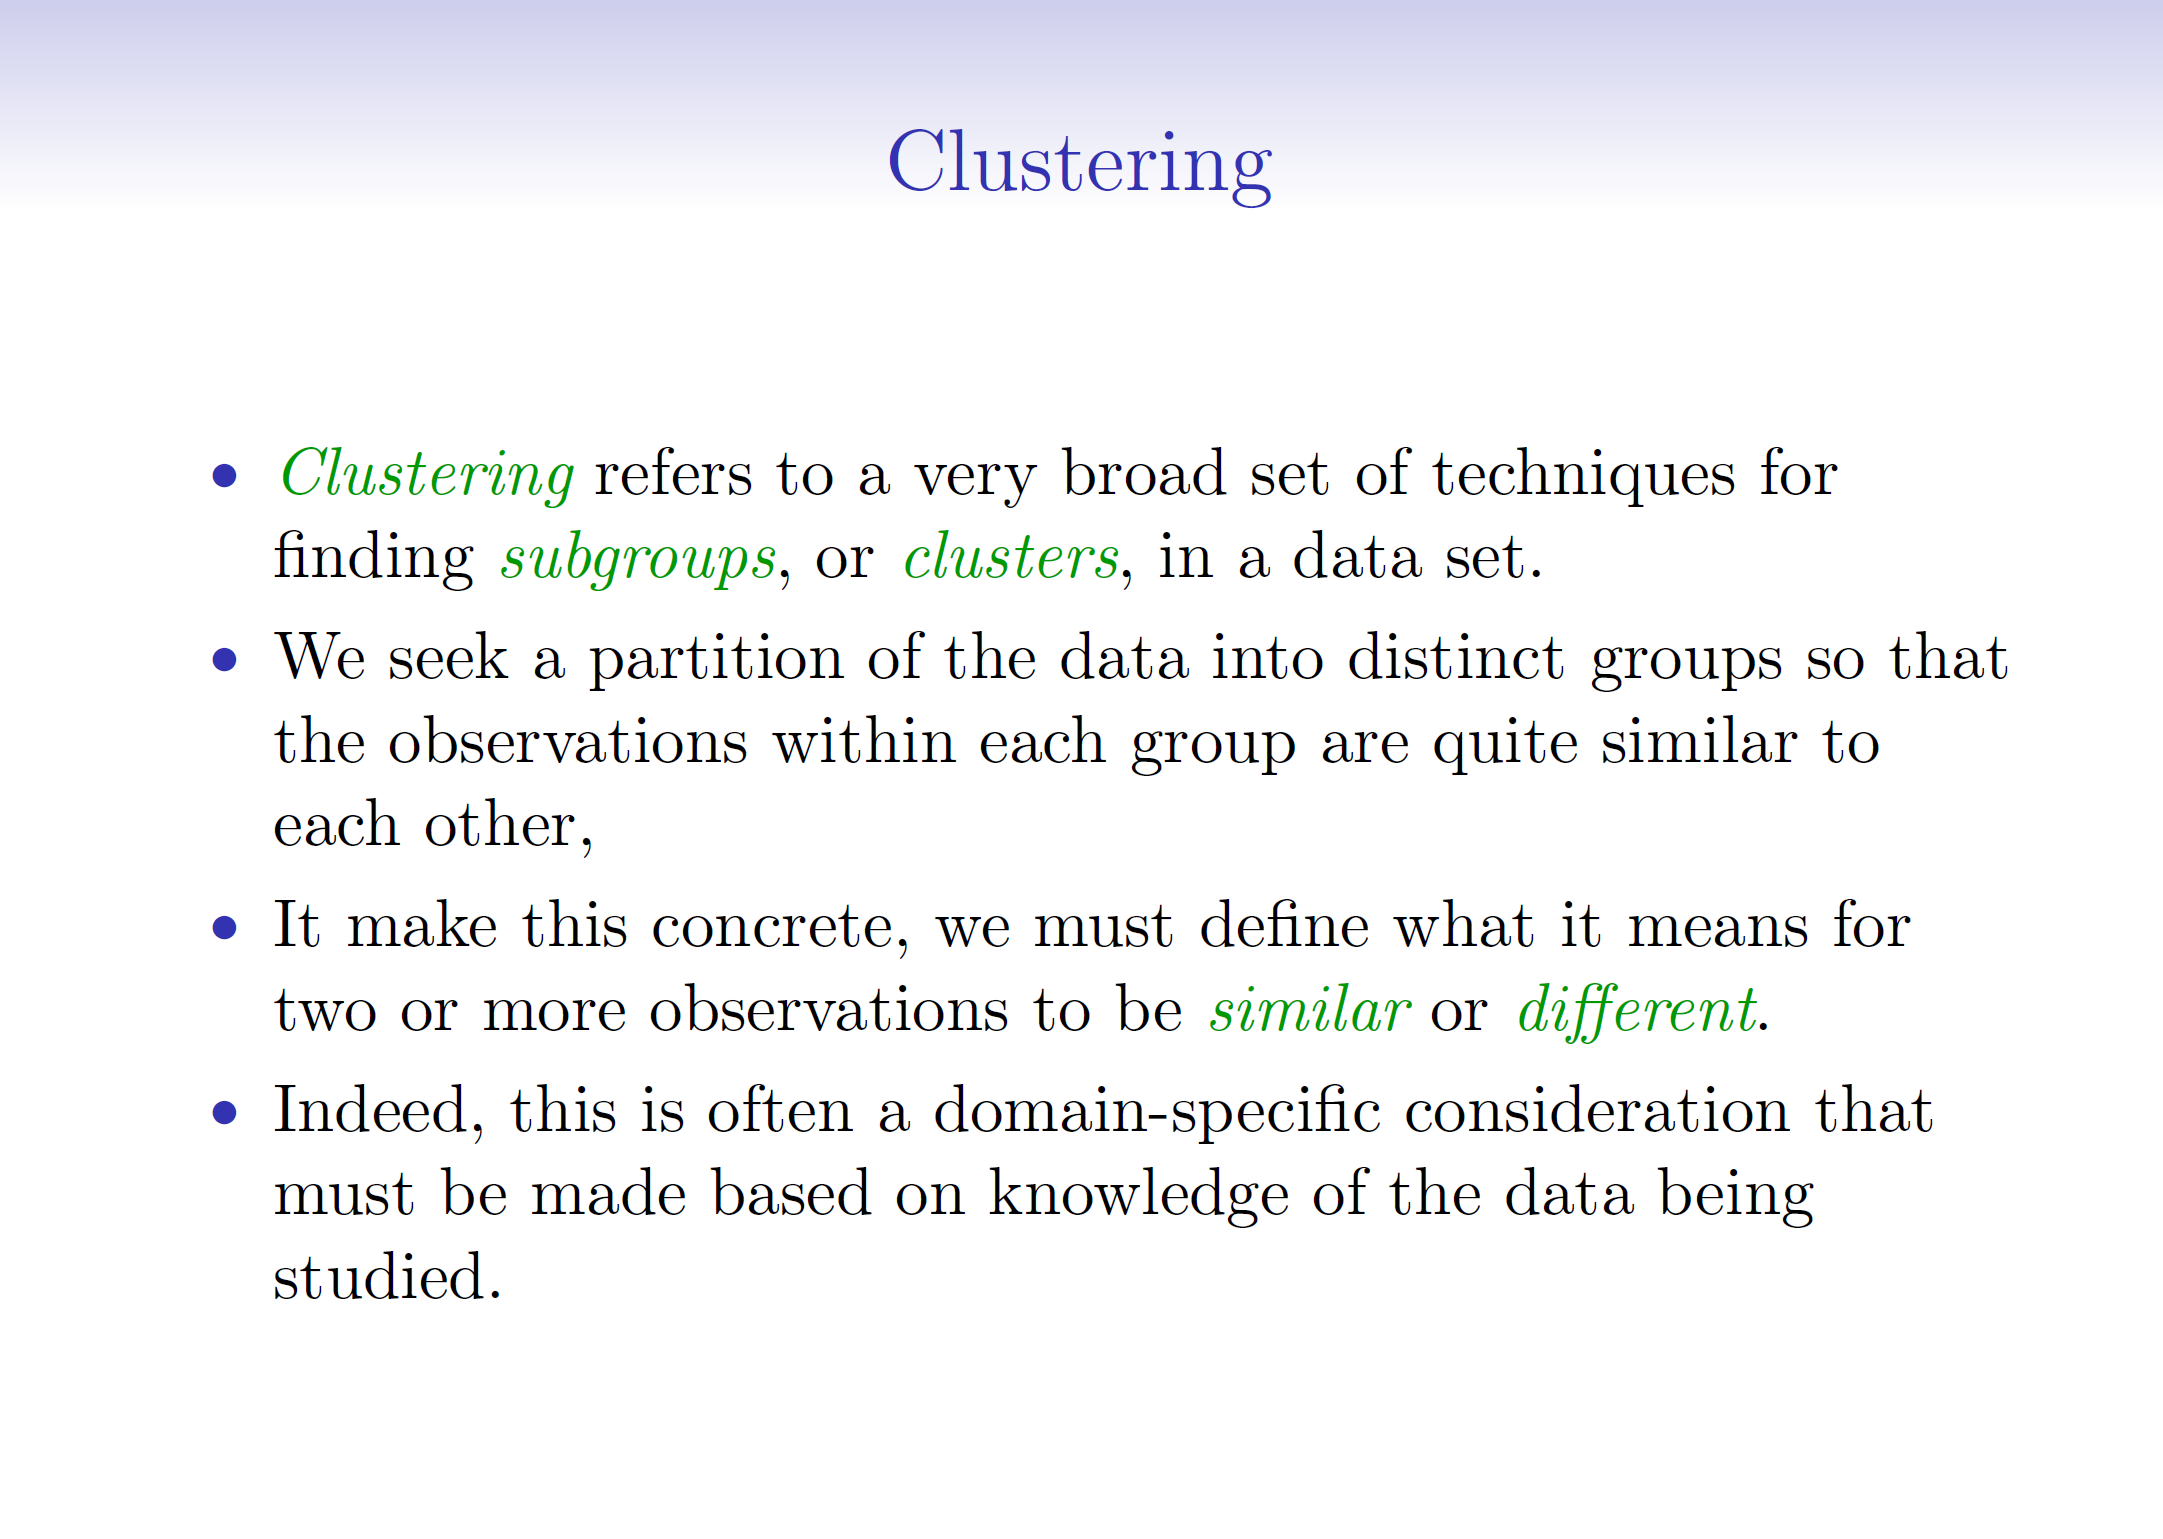

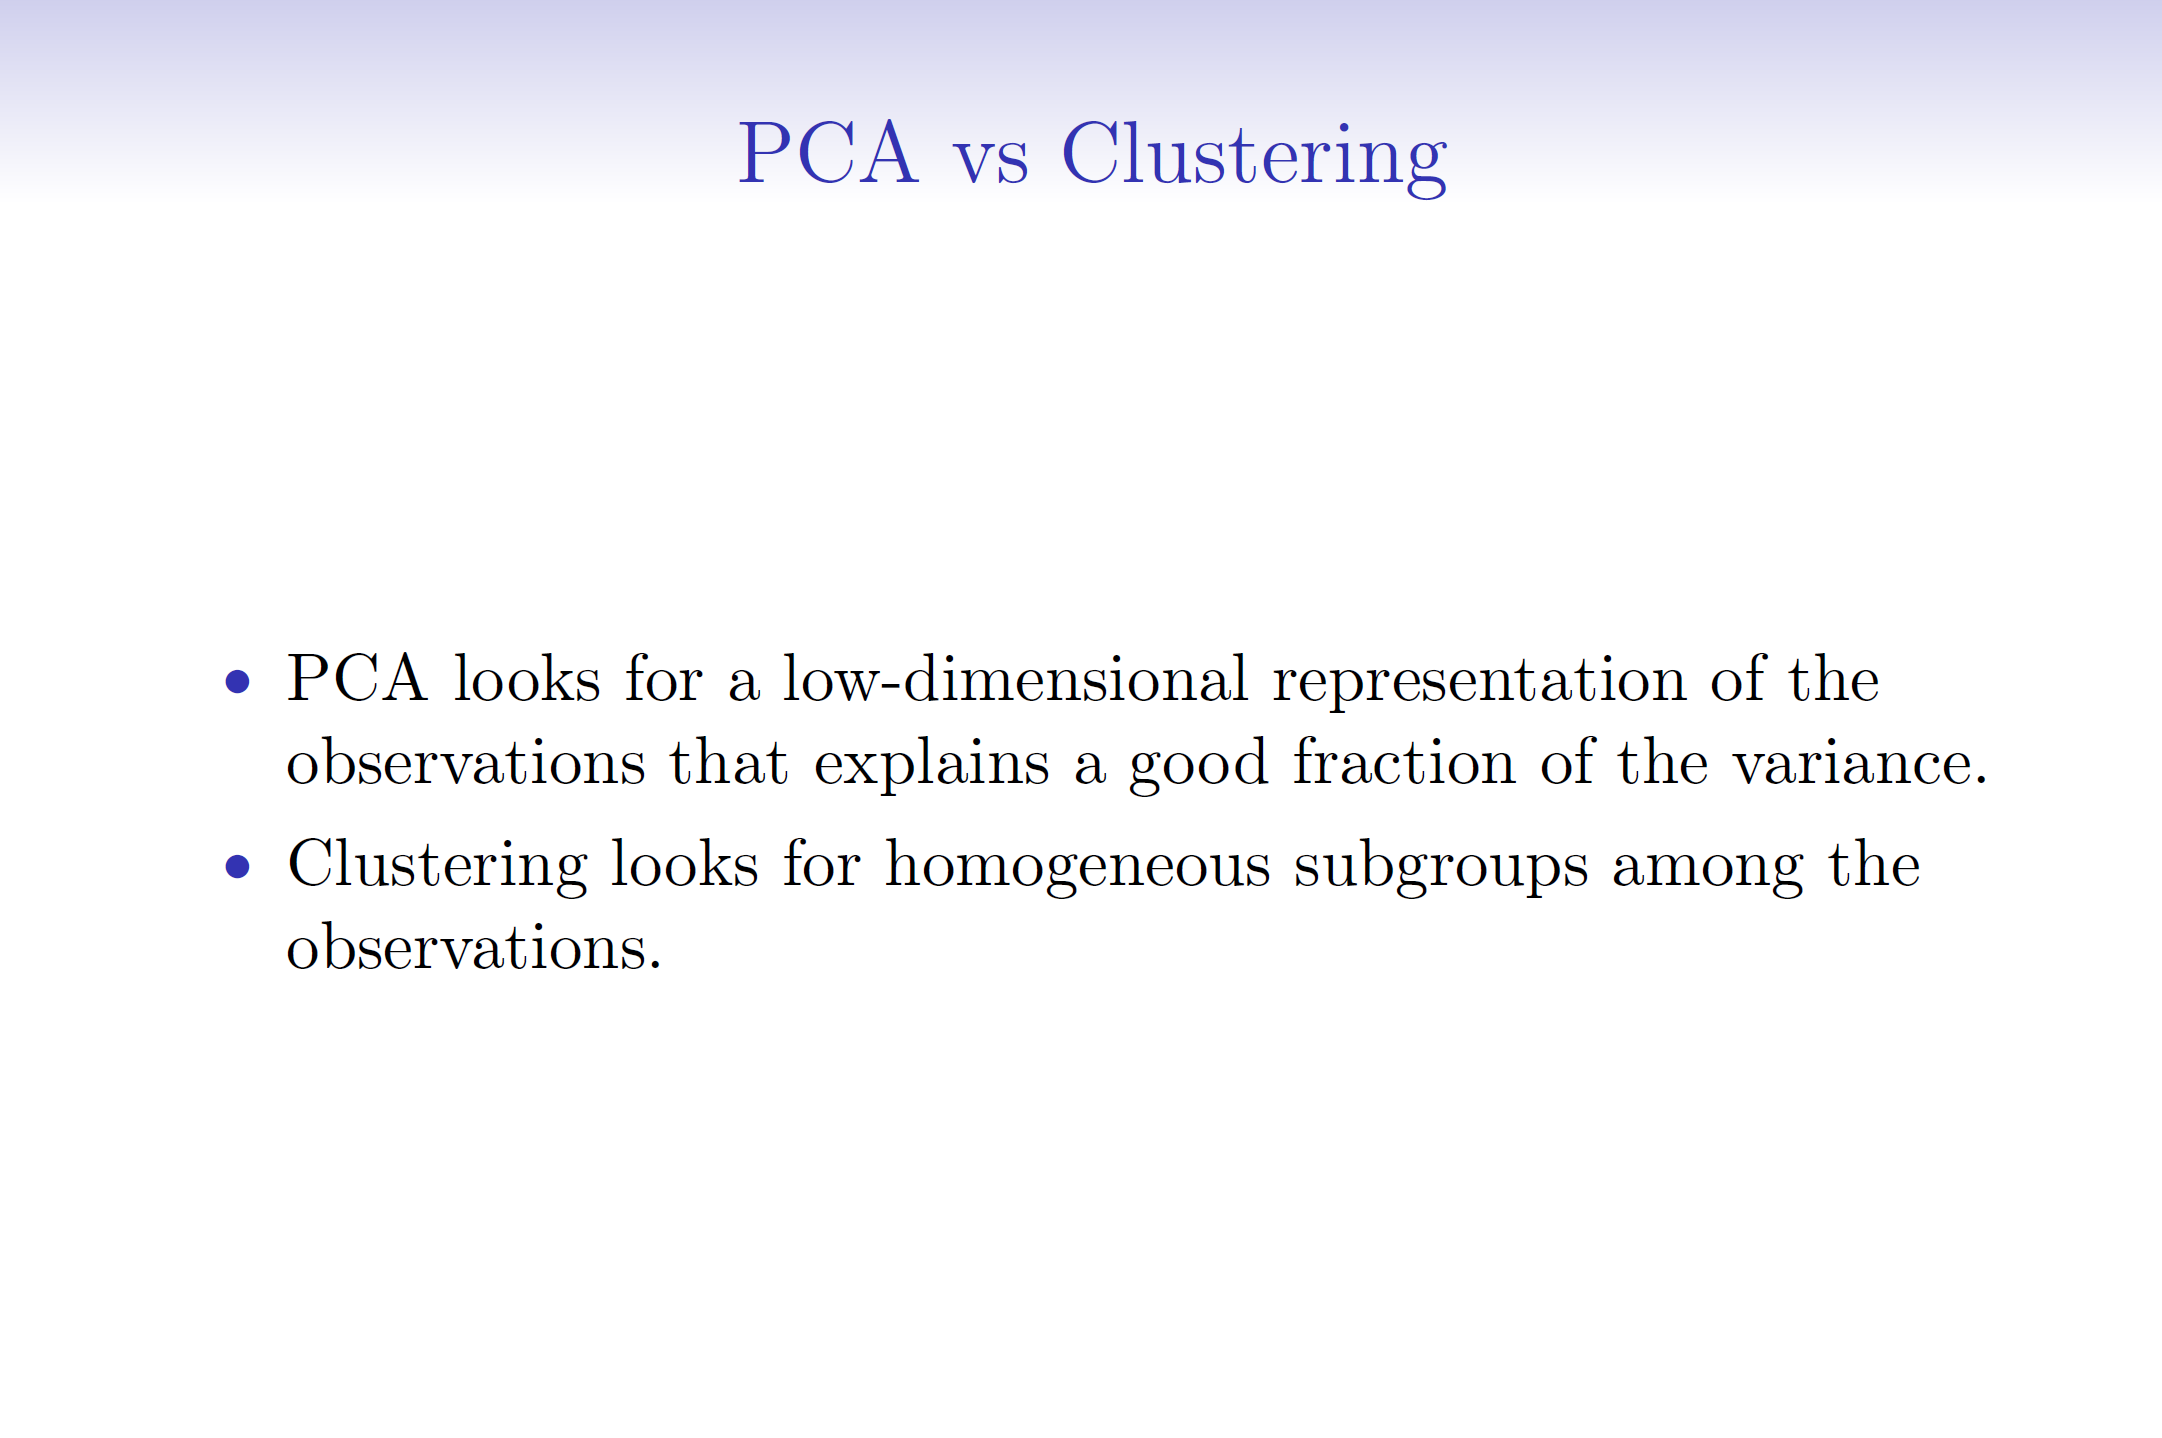

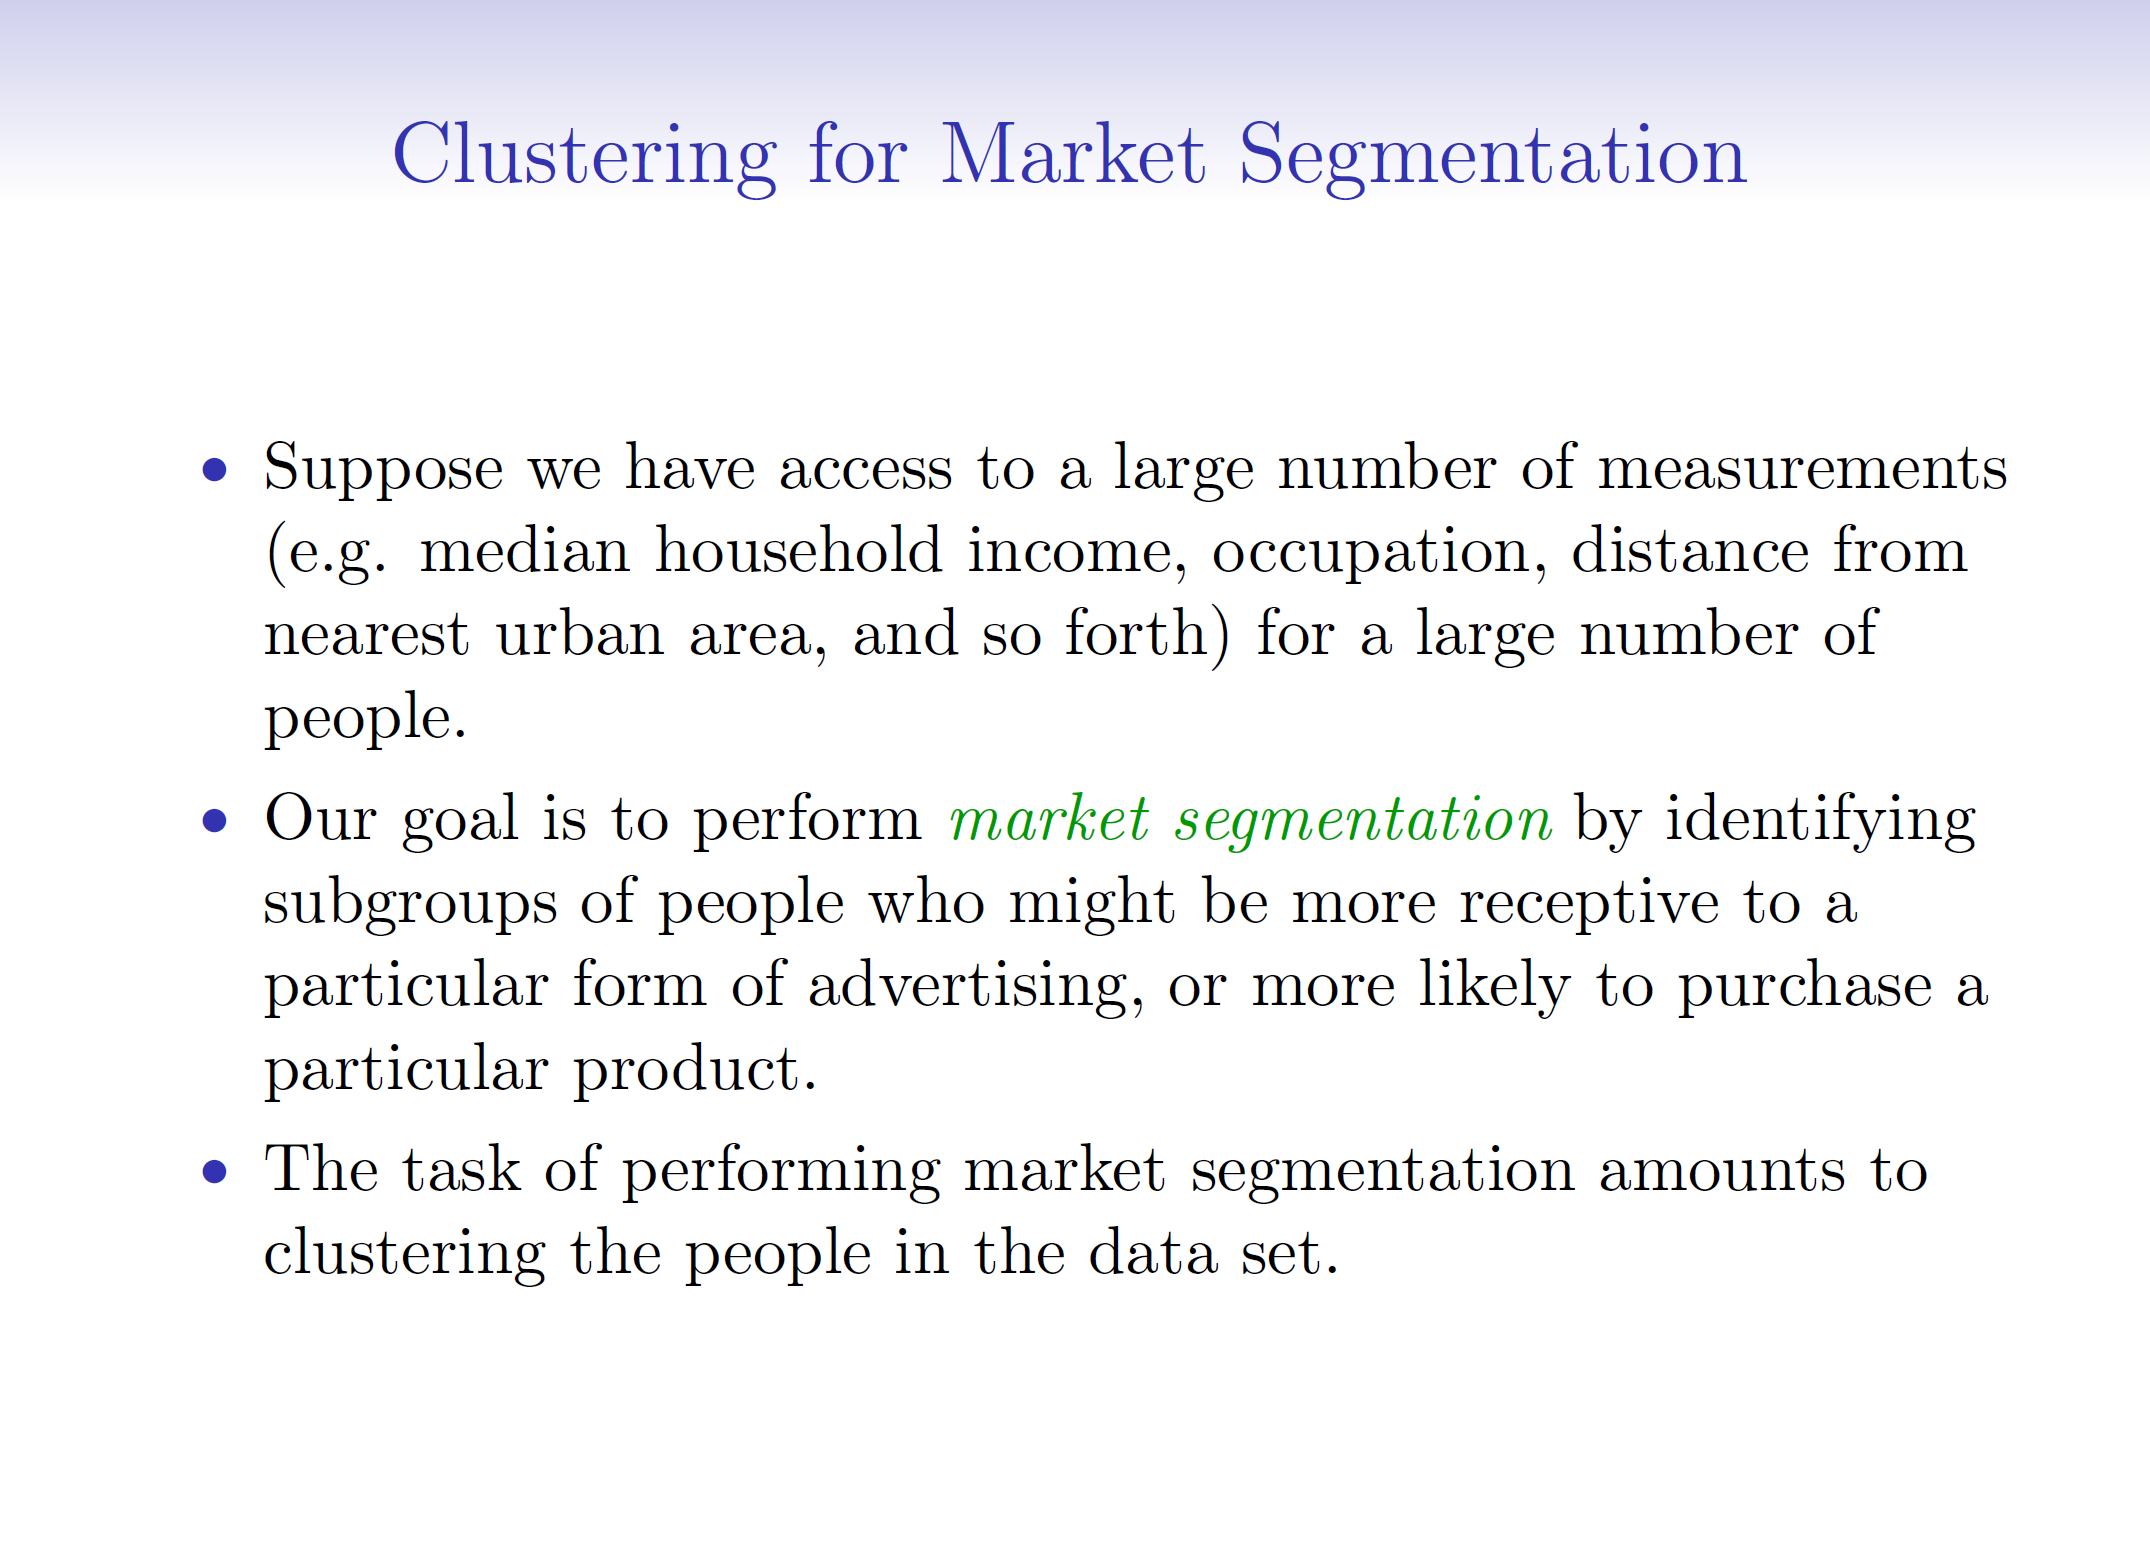

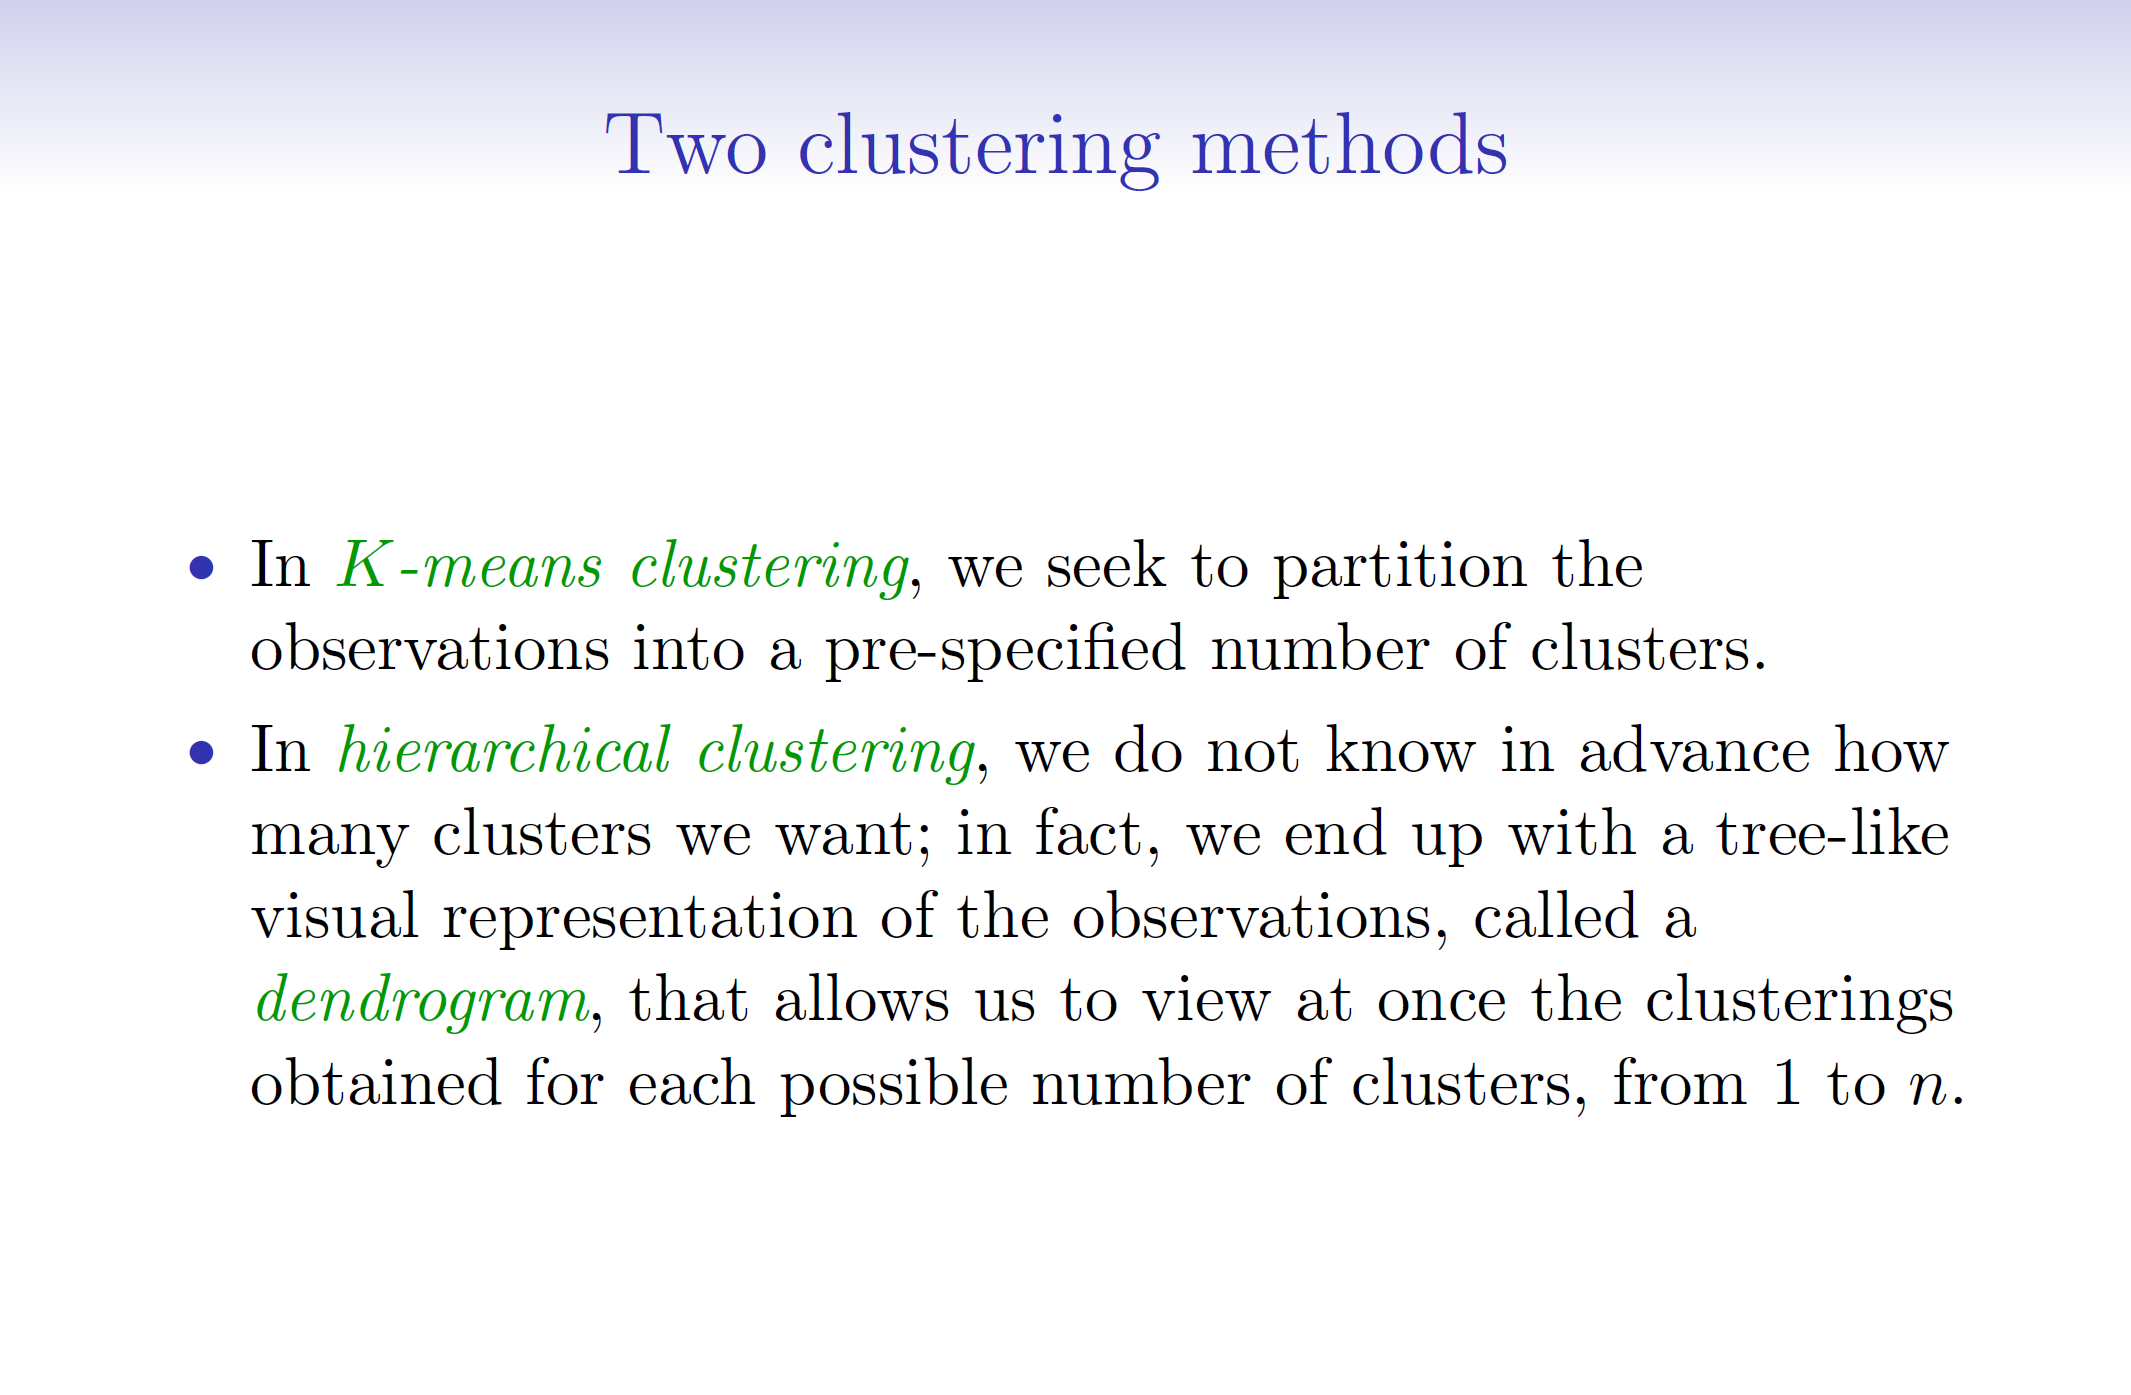

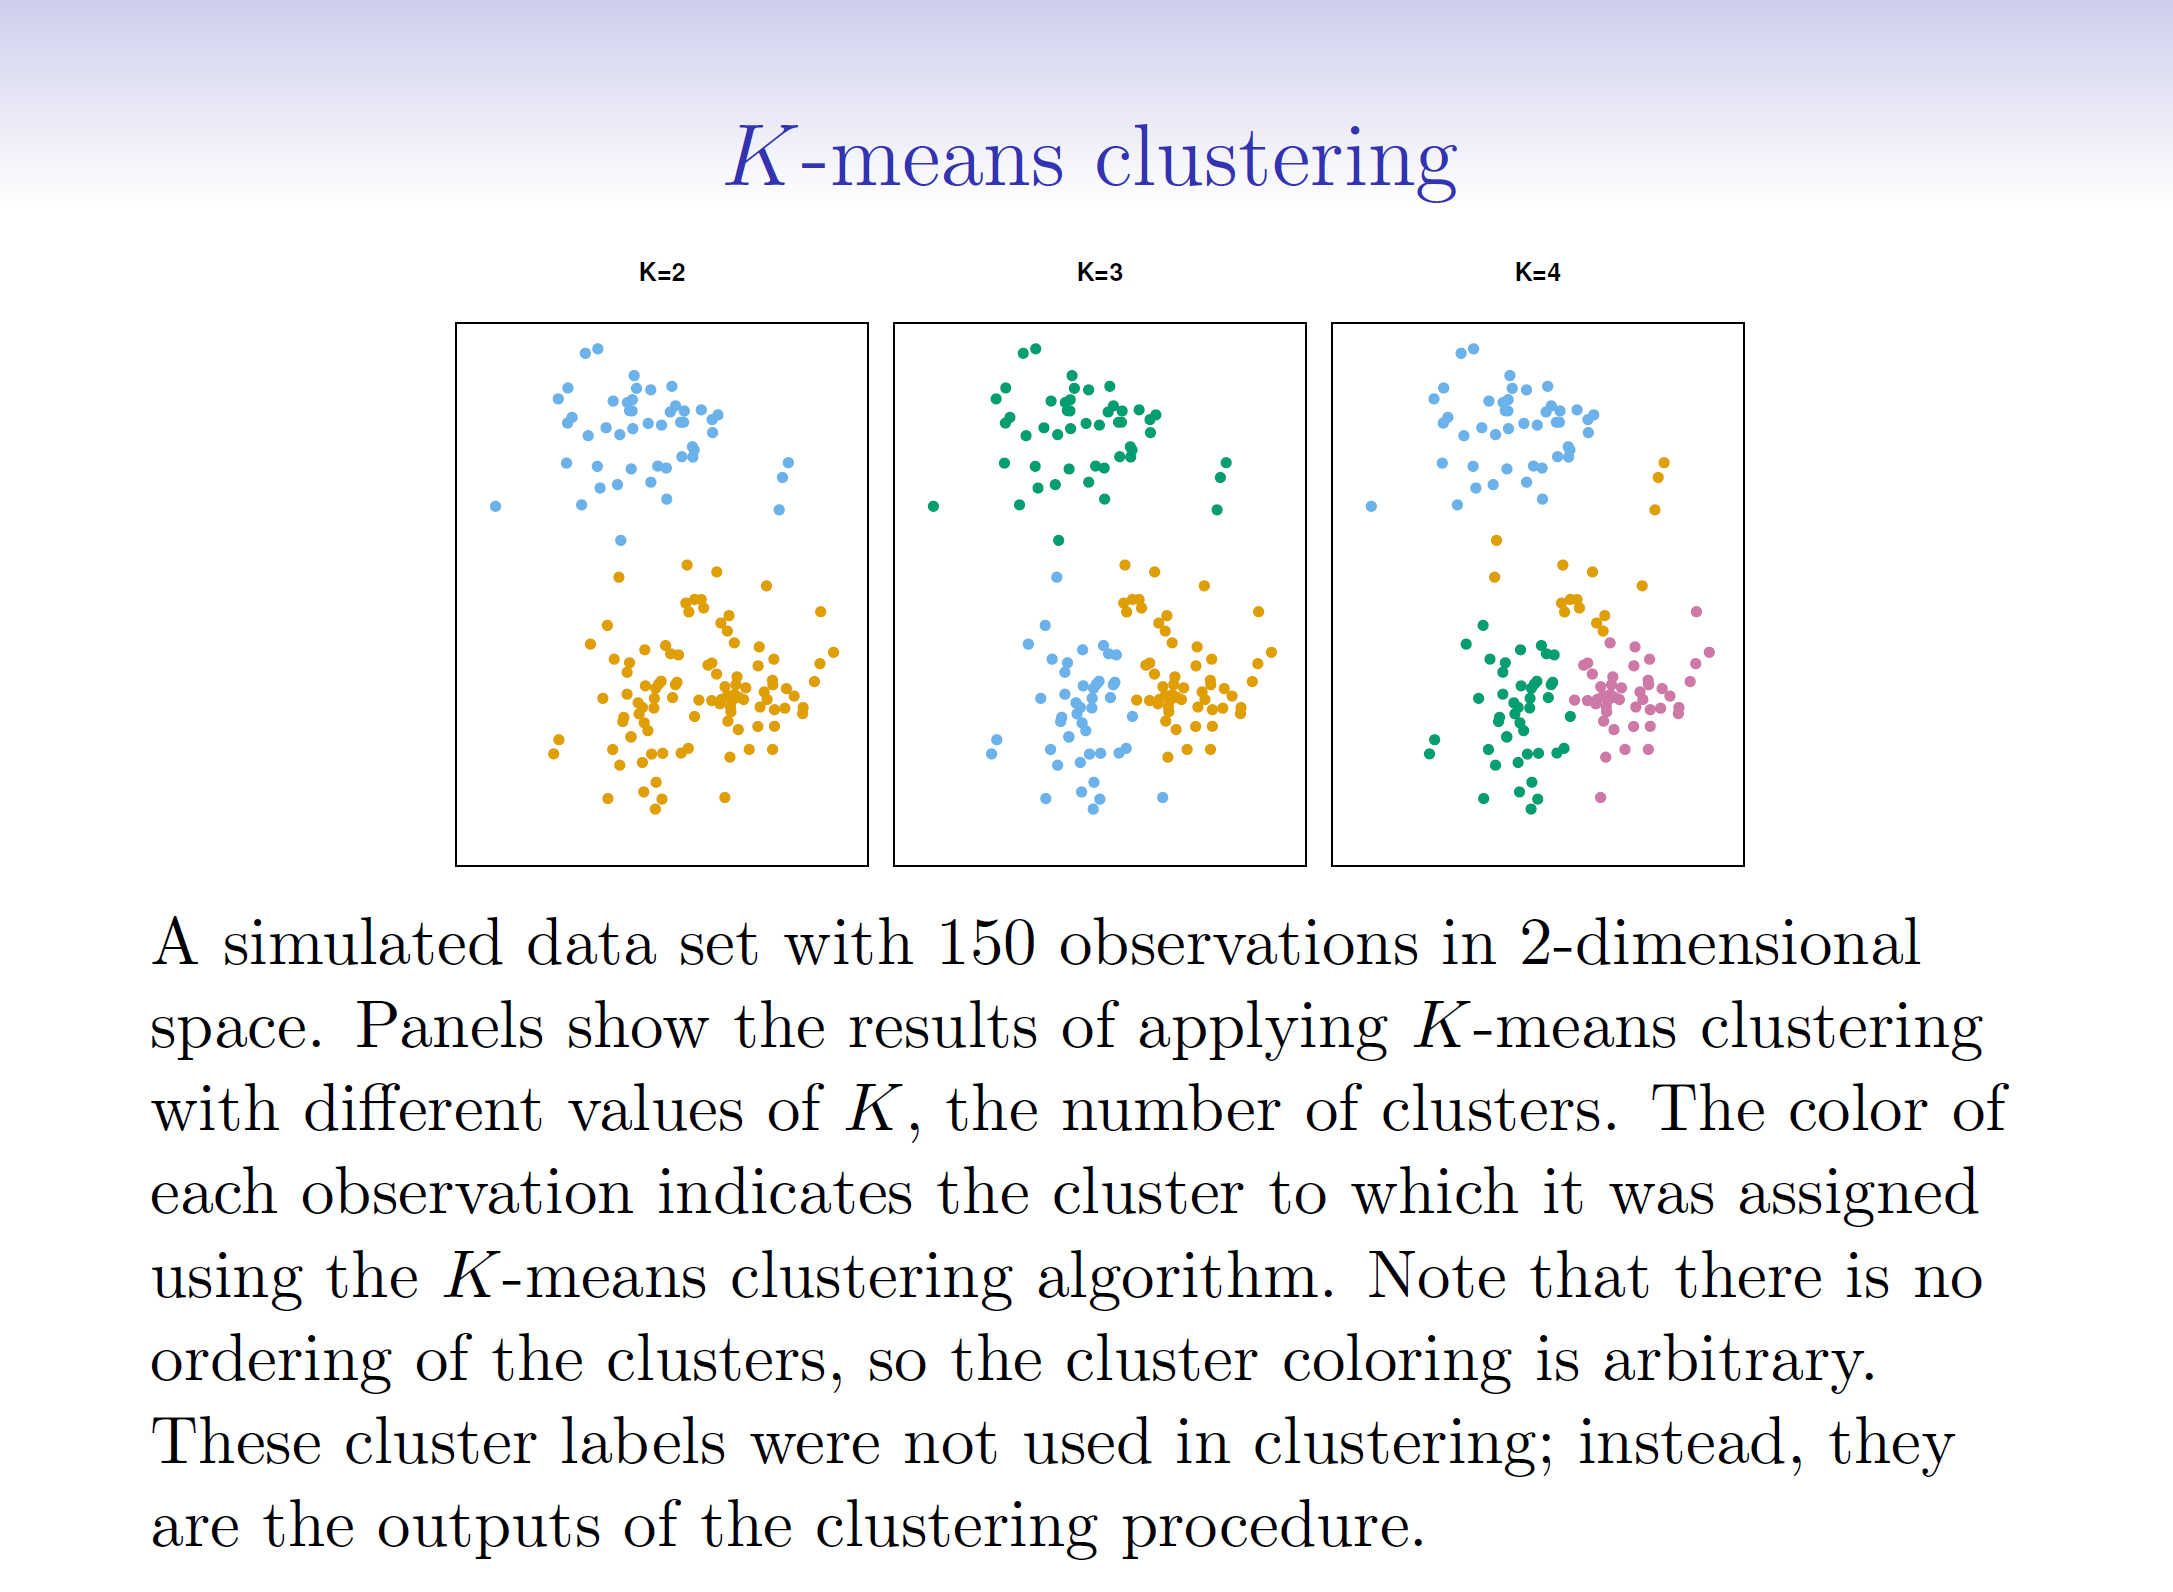

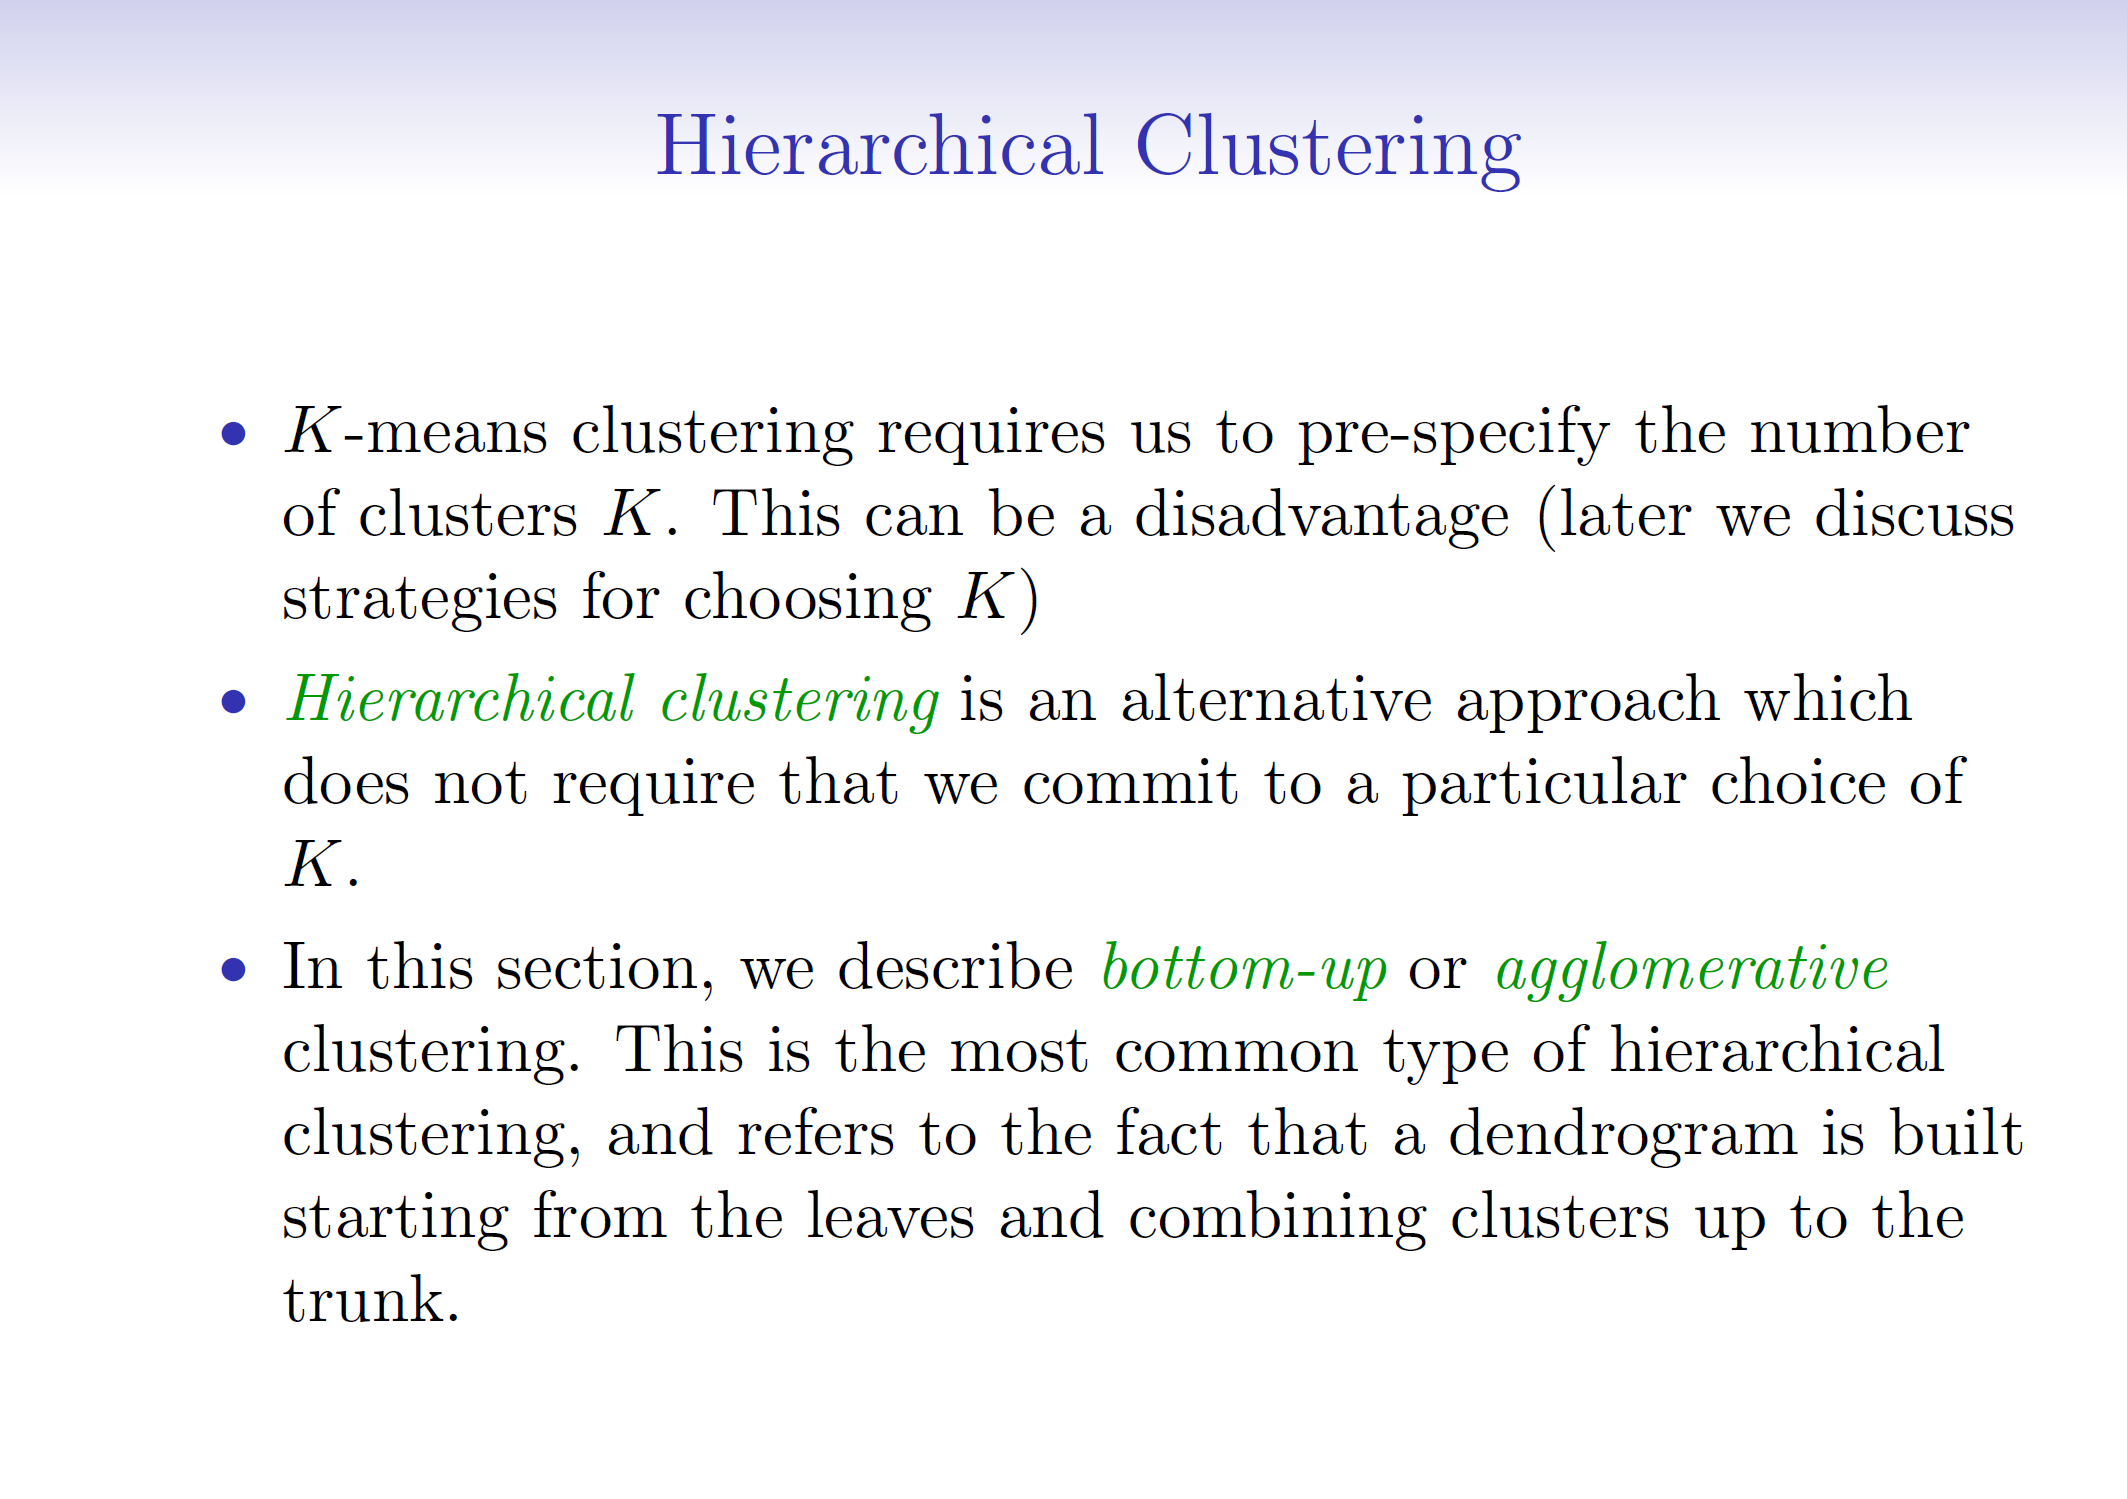

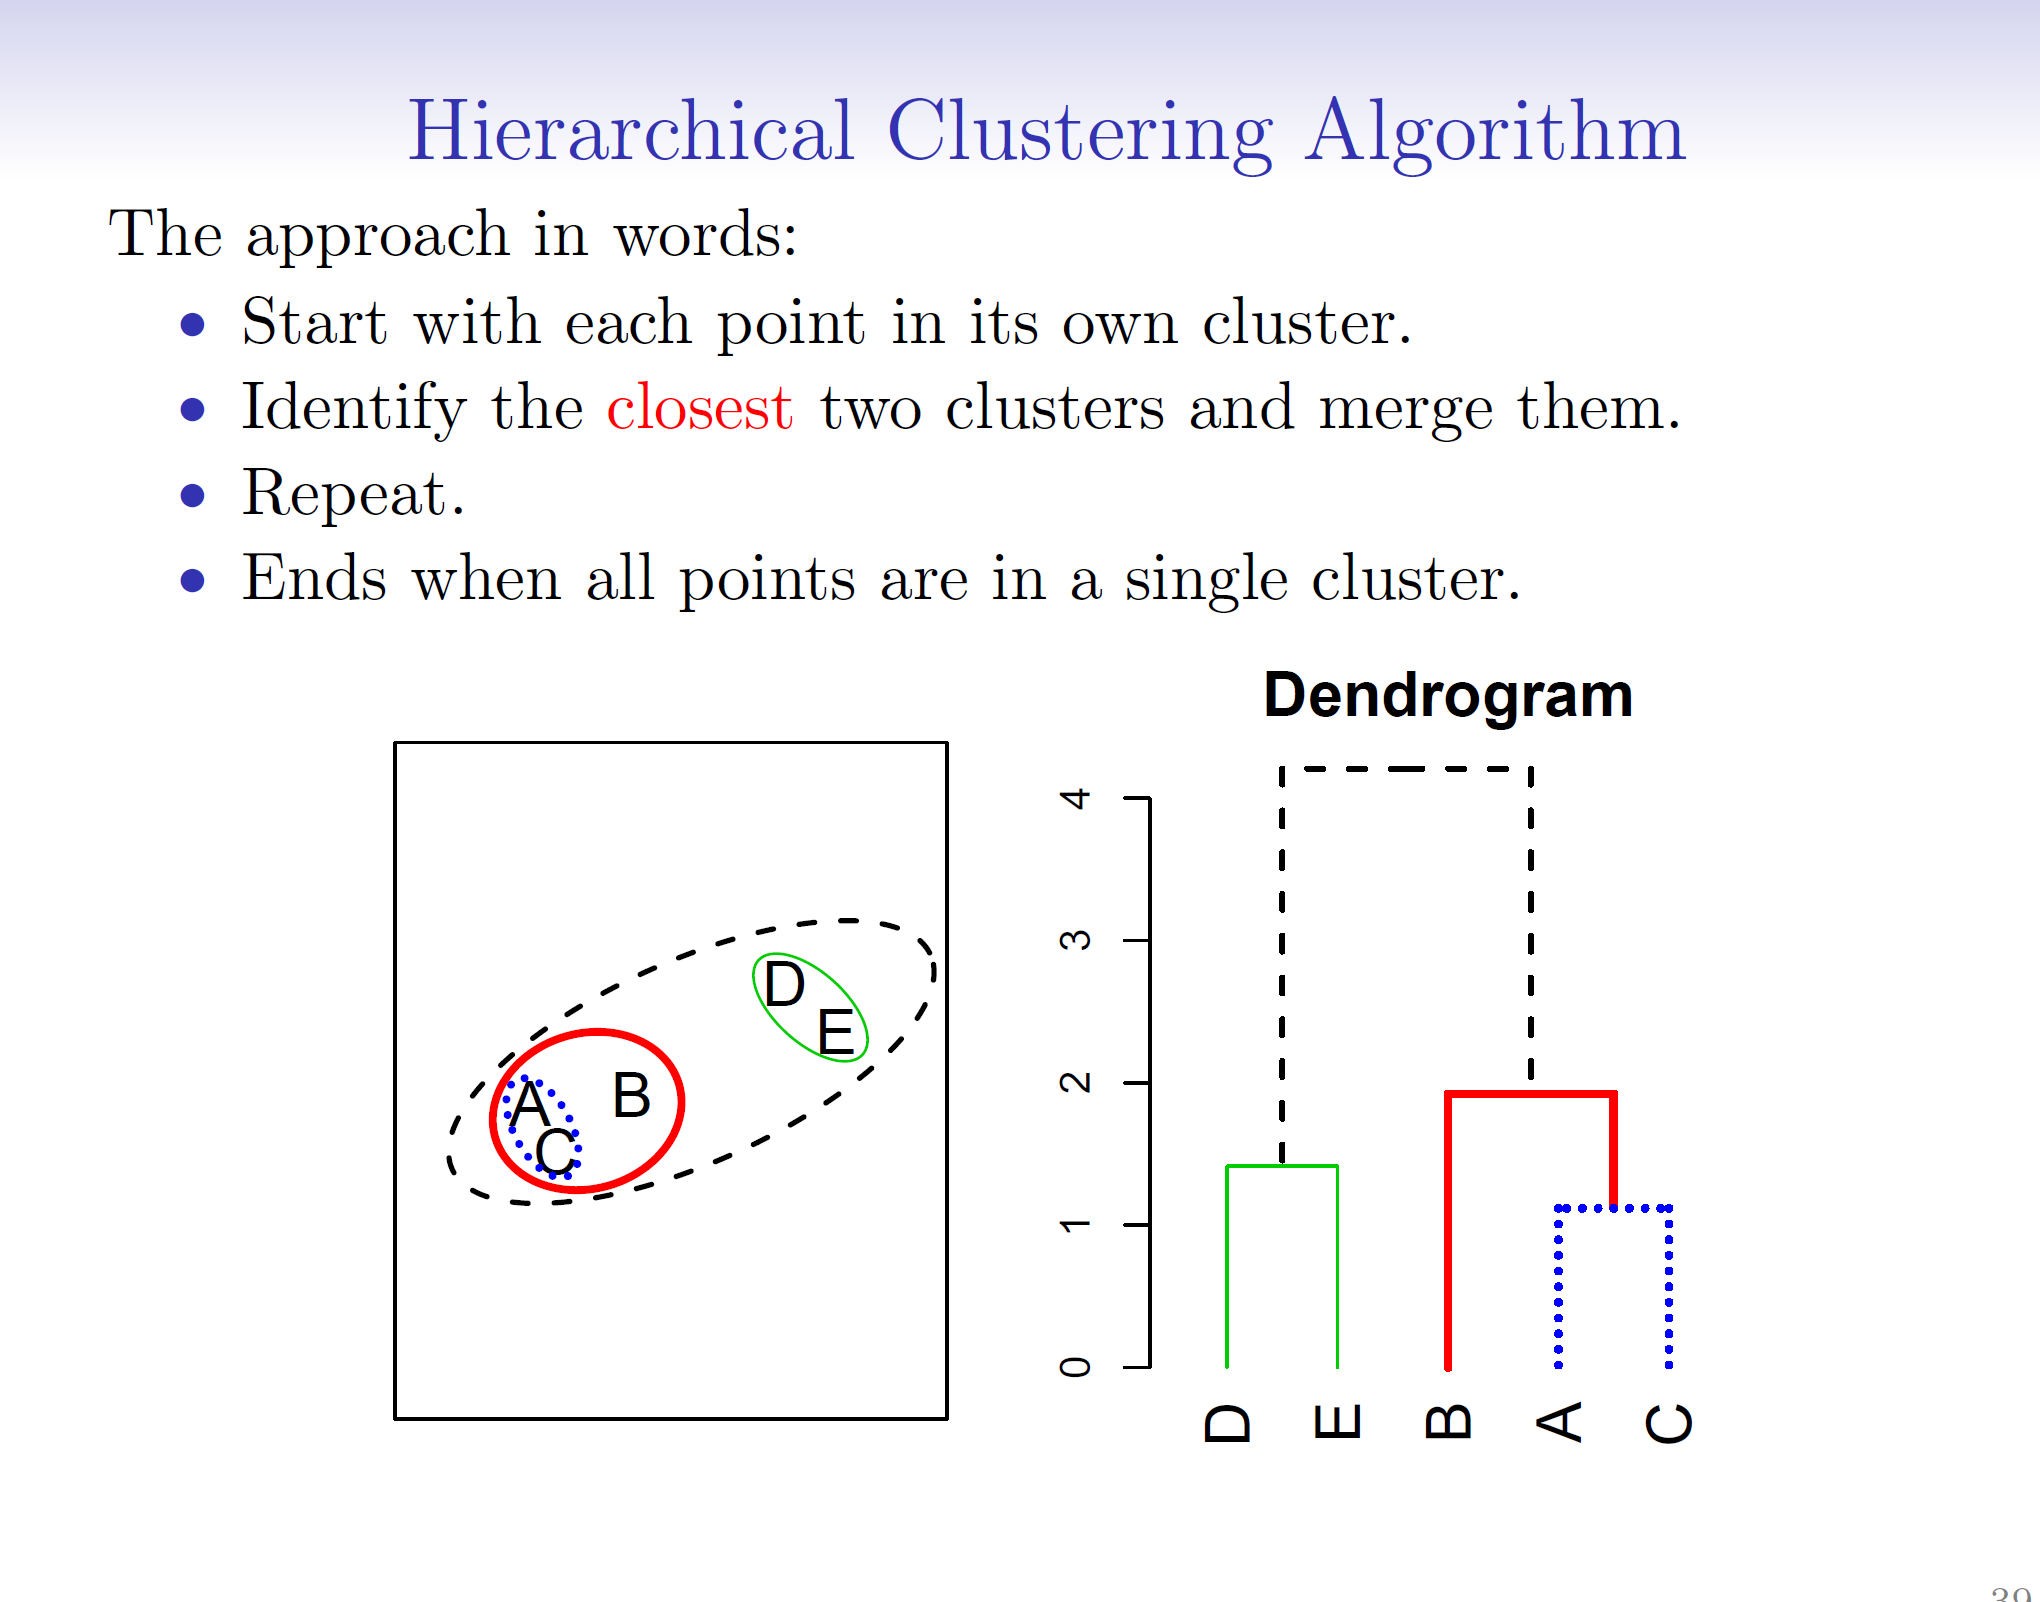

In [98]:
from sklearn import datasets

import pandas as pd

# Load data into a numpy array

boston=datasets.load_boston()

#Change the dataset into a pandas dataframe

dataset = pd.DataFrame(boston.data)
dataset.columns = boston.feature_names
print(dataset.head())

# K-Means Clustering with K=3

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

# Fit or train your dataset
kmeans.fit(dataset)



      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [99]:
# Learn the labels
labels = kmeans.predict(dataset)
centroids = kmeans.cluster_centers_

Text(0.5,1,'Kmeans')

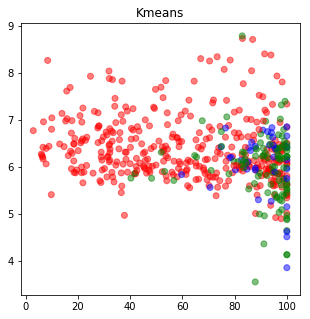

In [100]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(5, 5))
colormap = np.array(['red','green','blue'])

plt.scatter(dataset['AGE'], dataset['RM'],color=colormap[labels], alpha=0.5)
plt.title('Kmeans')



### TOPIC 2: TIME SERIES ANALYSIS

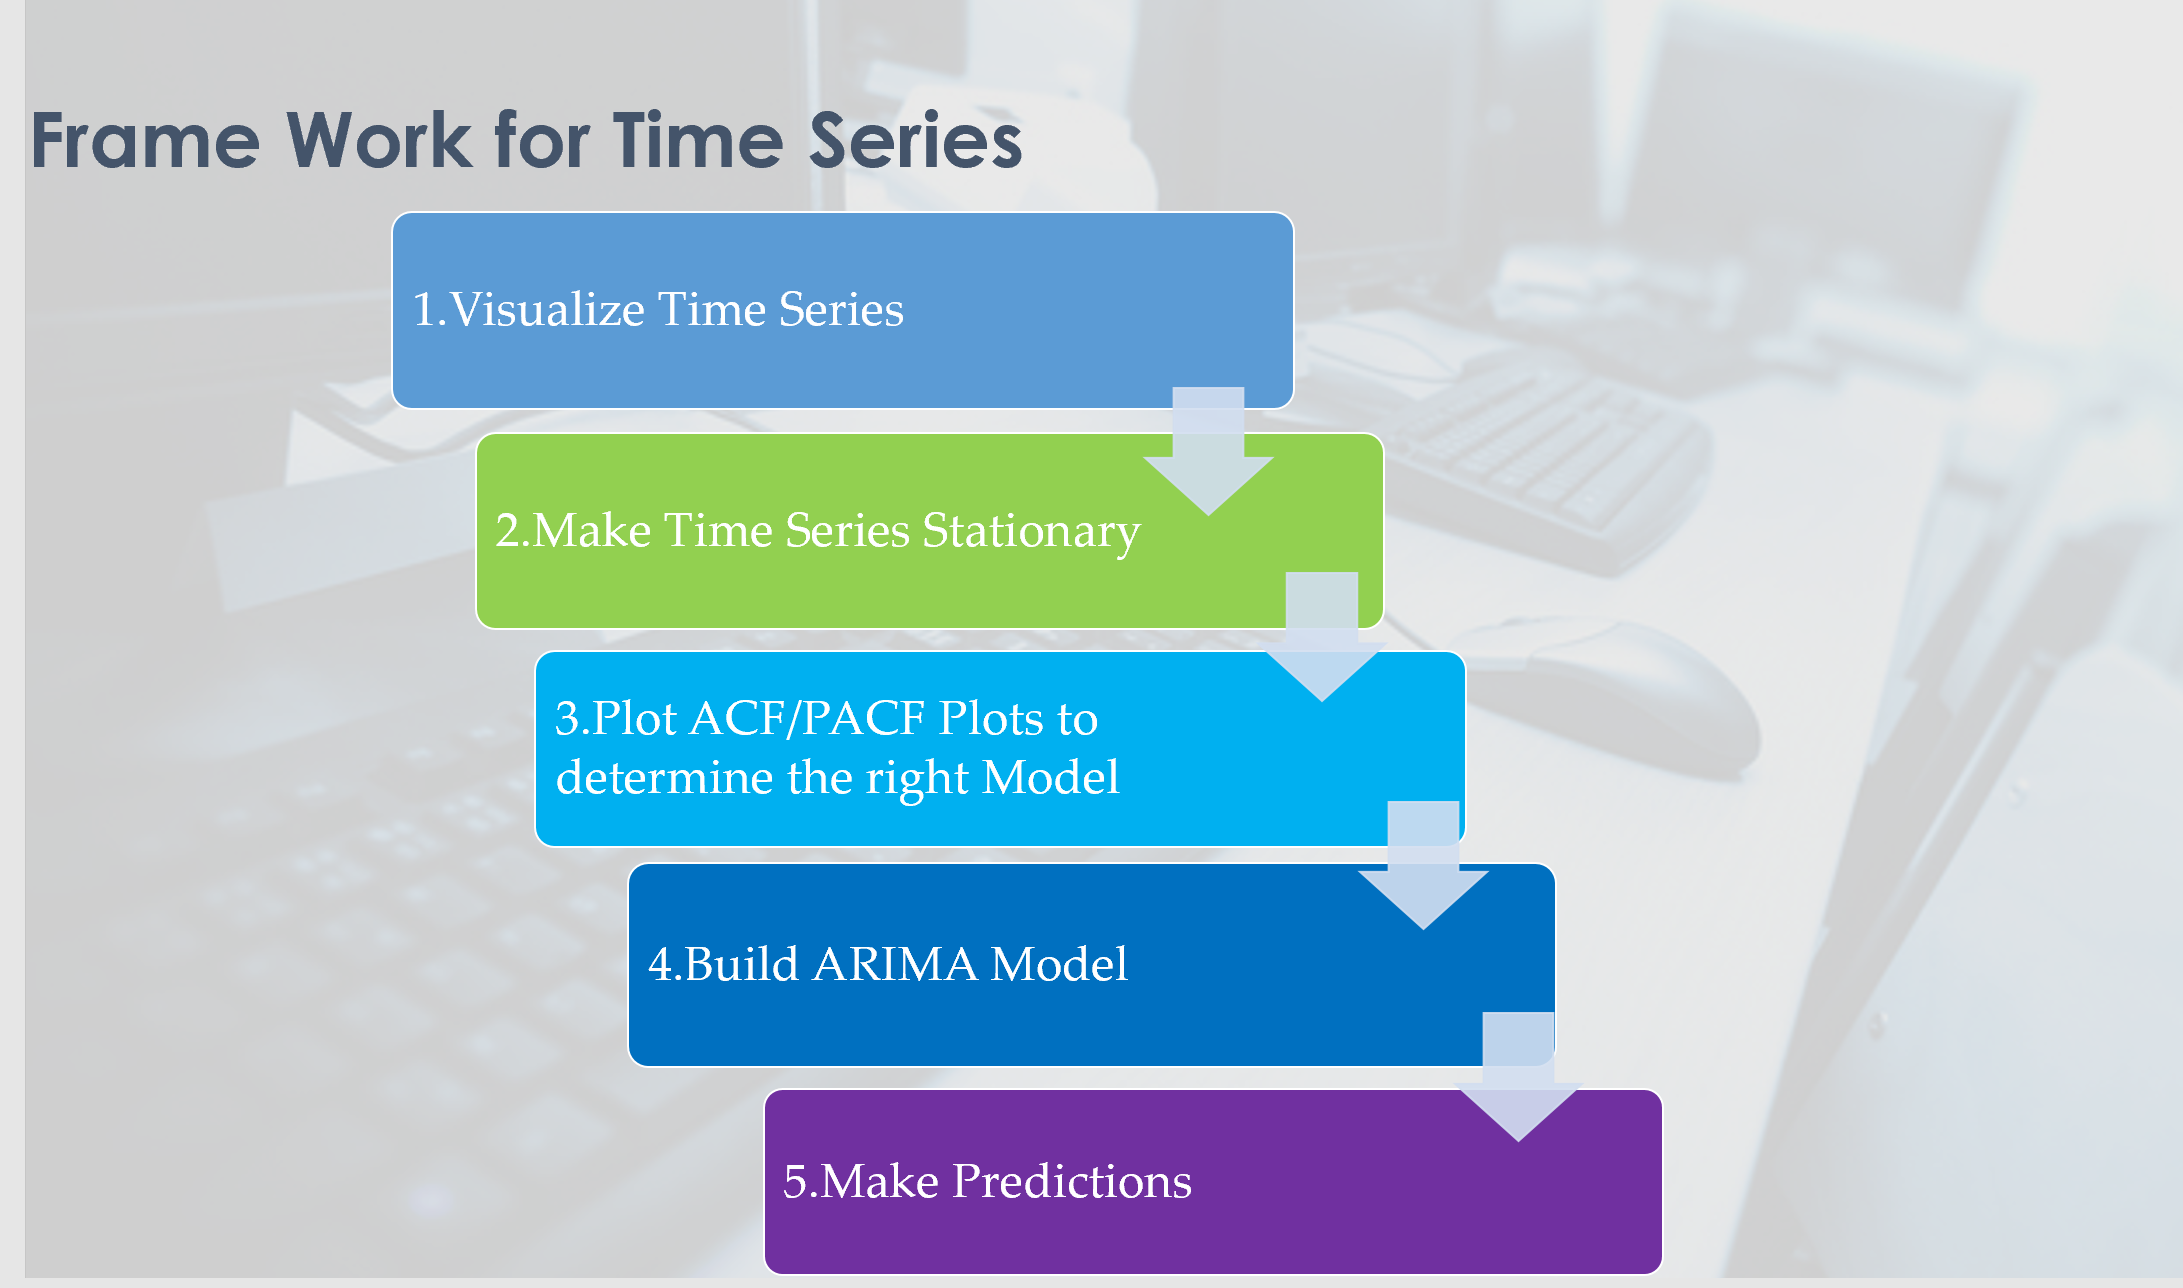

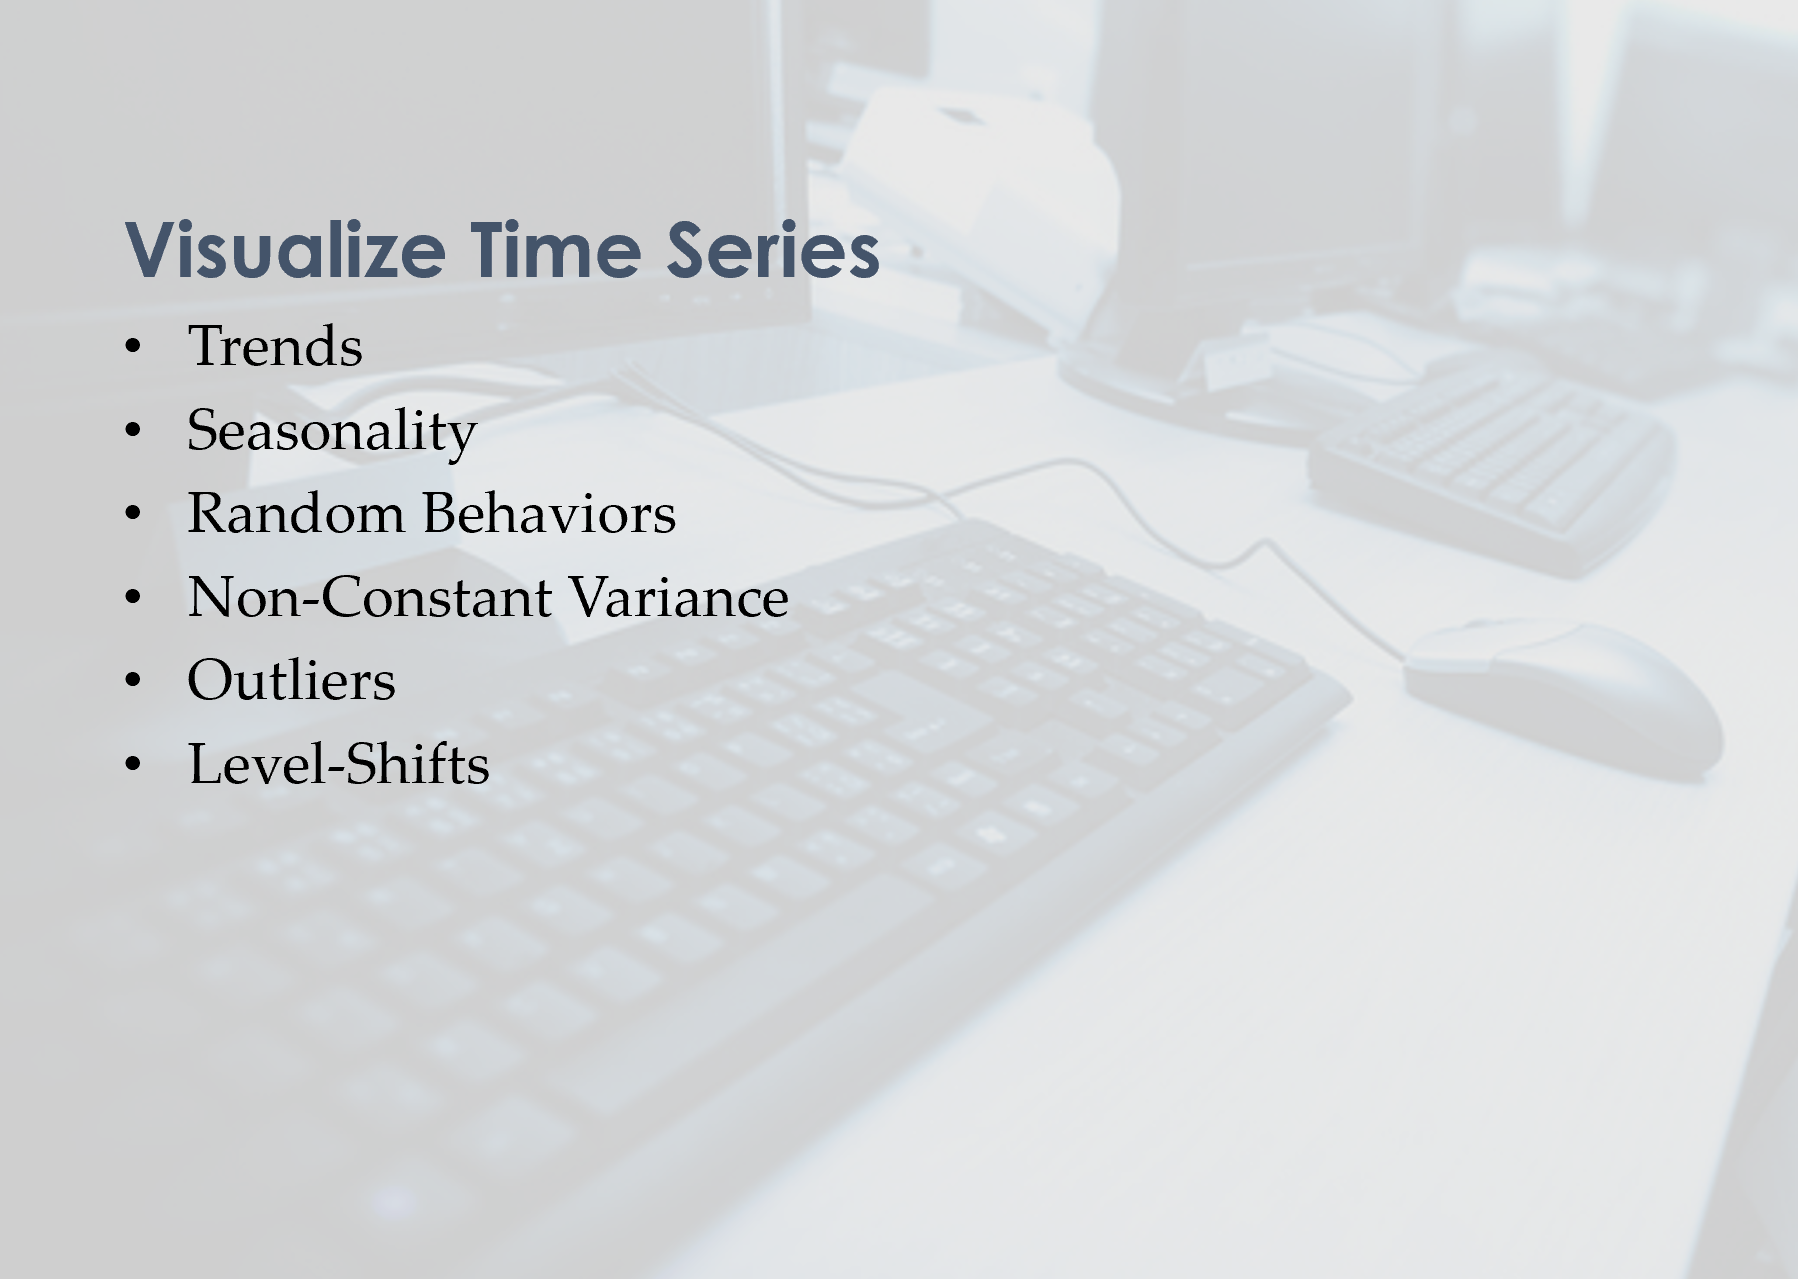

In [3]:
#pip install pmdarima

In [7]:

# import libraries required to read in the data set
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import statsmodels.api as sm
import warnings
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
from pandas.plotting import autocorrelation_plot
# change your current working directory to the folder with the data set
####os.chdir('C:\\Users\\abiod\\Desktop\\R and D\\Data science\\data set')
#Read in the data set as a pandas data frame
dataset=pd.read_csv('Walmart.csv',parse_dates=['Date'], index_col='Date')
# Check the first few and last few rows of data
dataset.head()
dataset.tail()




Value    Rev
Date                           
2000-04-30  4.344700e+10  43447
2000-01-31  5.186800e+10  51868
1999-10-31  4.089800e+10  40898
1999-07-31  3.891300e+10  38913
1999-04-30  3.512900e+10  35129

In [8]:
dataset.index


DatetimeIndex(['2017-10-31', '2017-07-31', '2017-04-30', '2017-01-31',
               '2016-10-31', '2016-07-31', '2016-04-30', '2016-01-31',
               '2015-10-31', '2015-07-31', '2015-04-30', '2015-01-31',
               '2014-10-31', '2014-07-31', '2014-04-30', '2014-01-31',
               '2013-10-31', '2013-07-31', '2013-04-30', '2013-01-31',
               '2012-10-31', '2012-07-31', '2012-04-30', '2012-01-31',
               '2011-10-31', '2011-07-31', '2011-04-30', '2011-01-31',
               '2010-10-31', '2010-07-31', '2010-04-30', '2010-01-31',
               '2009-10-31', '2009-07-31', '2009-04-30', '2009-01-31',
               '2008-10-31', '2008-07-31', '2008-04-30', '2008-01-31',
               '2007-10-31', '2007-07-31', '2007-04-30', '2007-01-31',
               '2006-10-31', '2006-07-31', '2006-04-30', '2006-01-31',
               '2005-10-31', '2005-07-31', '2005-04-30', '2005-01-31',
               '2004-10-31', '2004-07-31', '2004-04-30', '2004-01-31',
      

<AxesSubplot:xlabel='Date'>

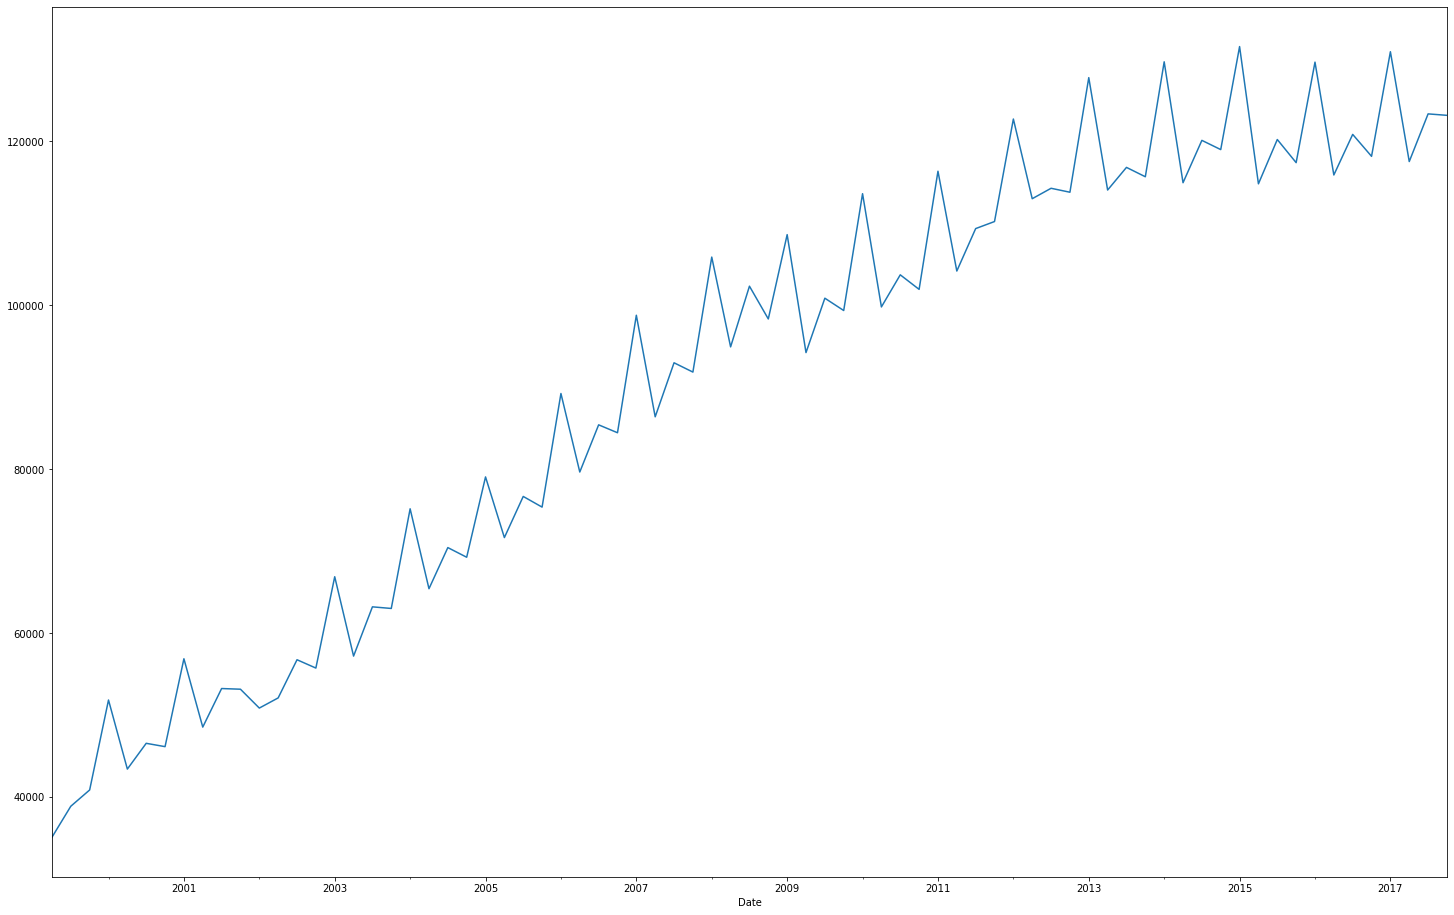

In [9]:
# Convert dataset into a time series object
ts = dataset['Rev'] 
ts.head(10)
#plt.plot(ts)
ts.plot(figsize=(25, 16))



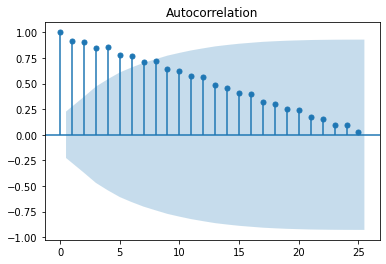

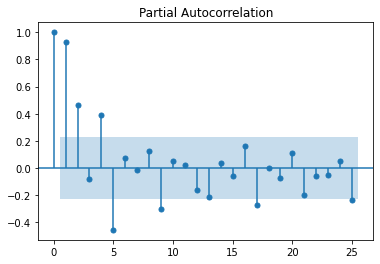

In [10]:
plot_acf(ts,lags=25)
plt.show()
plot_pacf(ts,lags=25)
plt.show()

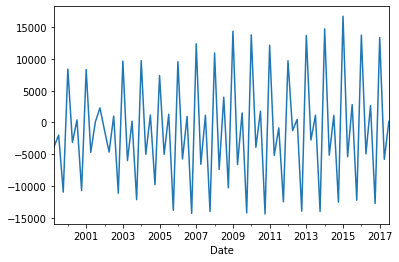

In [11]:
#detrend time series to make it seasonal

## Difference the Time Series
ts_diff = ts - ts.shift(1)
ts_diff=ts_diff[1:,]

# Plot new Time Series with differences
ts_diff.plot()
plt.show()



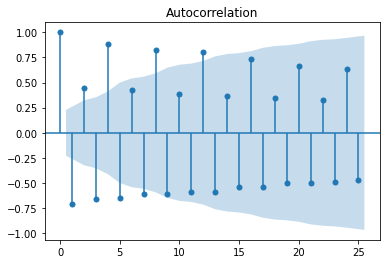

c:\python39\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


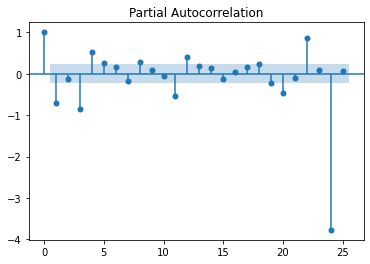

In [12]:
# ACF and PACF plots
plot_acf(ts_diff,lags=25)
plt.show()
plot_pacf(ts_diff,lags=25)
plt.show()

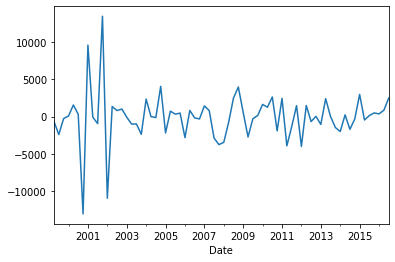

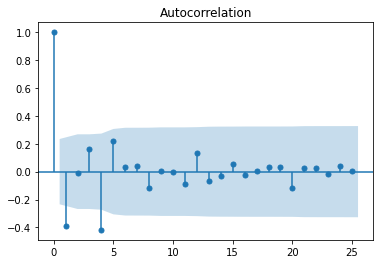

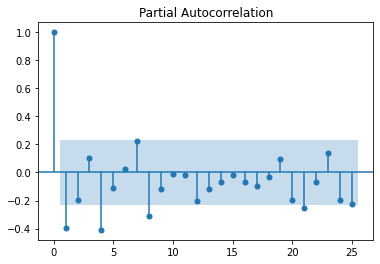

In [13]:
#remove seasonality

ts_diff = ts_diff - ts_diff.shift(4)
ts_diff=ts_diff[4:,]
# Plot new Time Series with differences
ts_diff.plot()
plt.show()
# Examine Correlation and Auto correlation of differenced series
plot_acf(ts_diff,lags=25)
plt.show()
plot_pacf(ts_diff,lags=25)
plt.show()

### Non Seasonal

 - Decreasing trend in PACF while ACF decays after 1

### Seasonal

 - Decreasing trend in PACF while ACF decays after 1

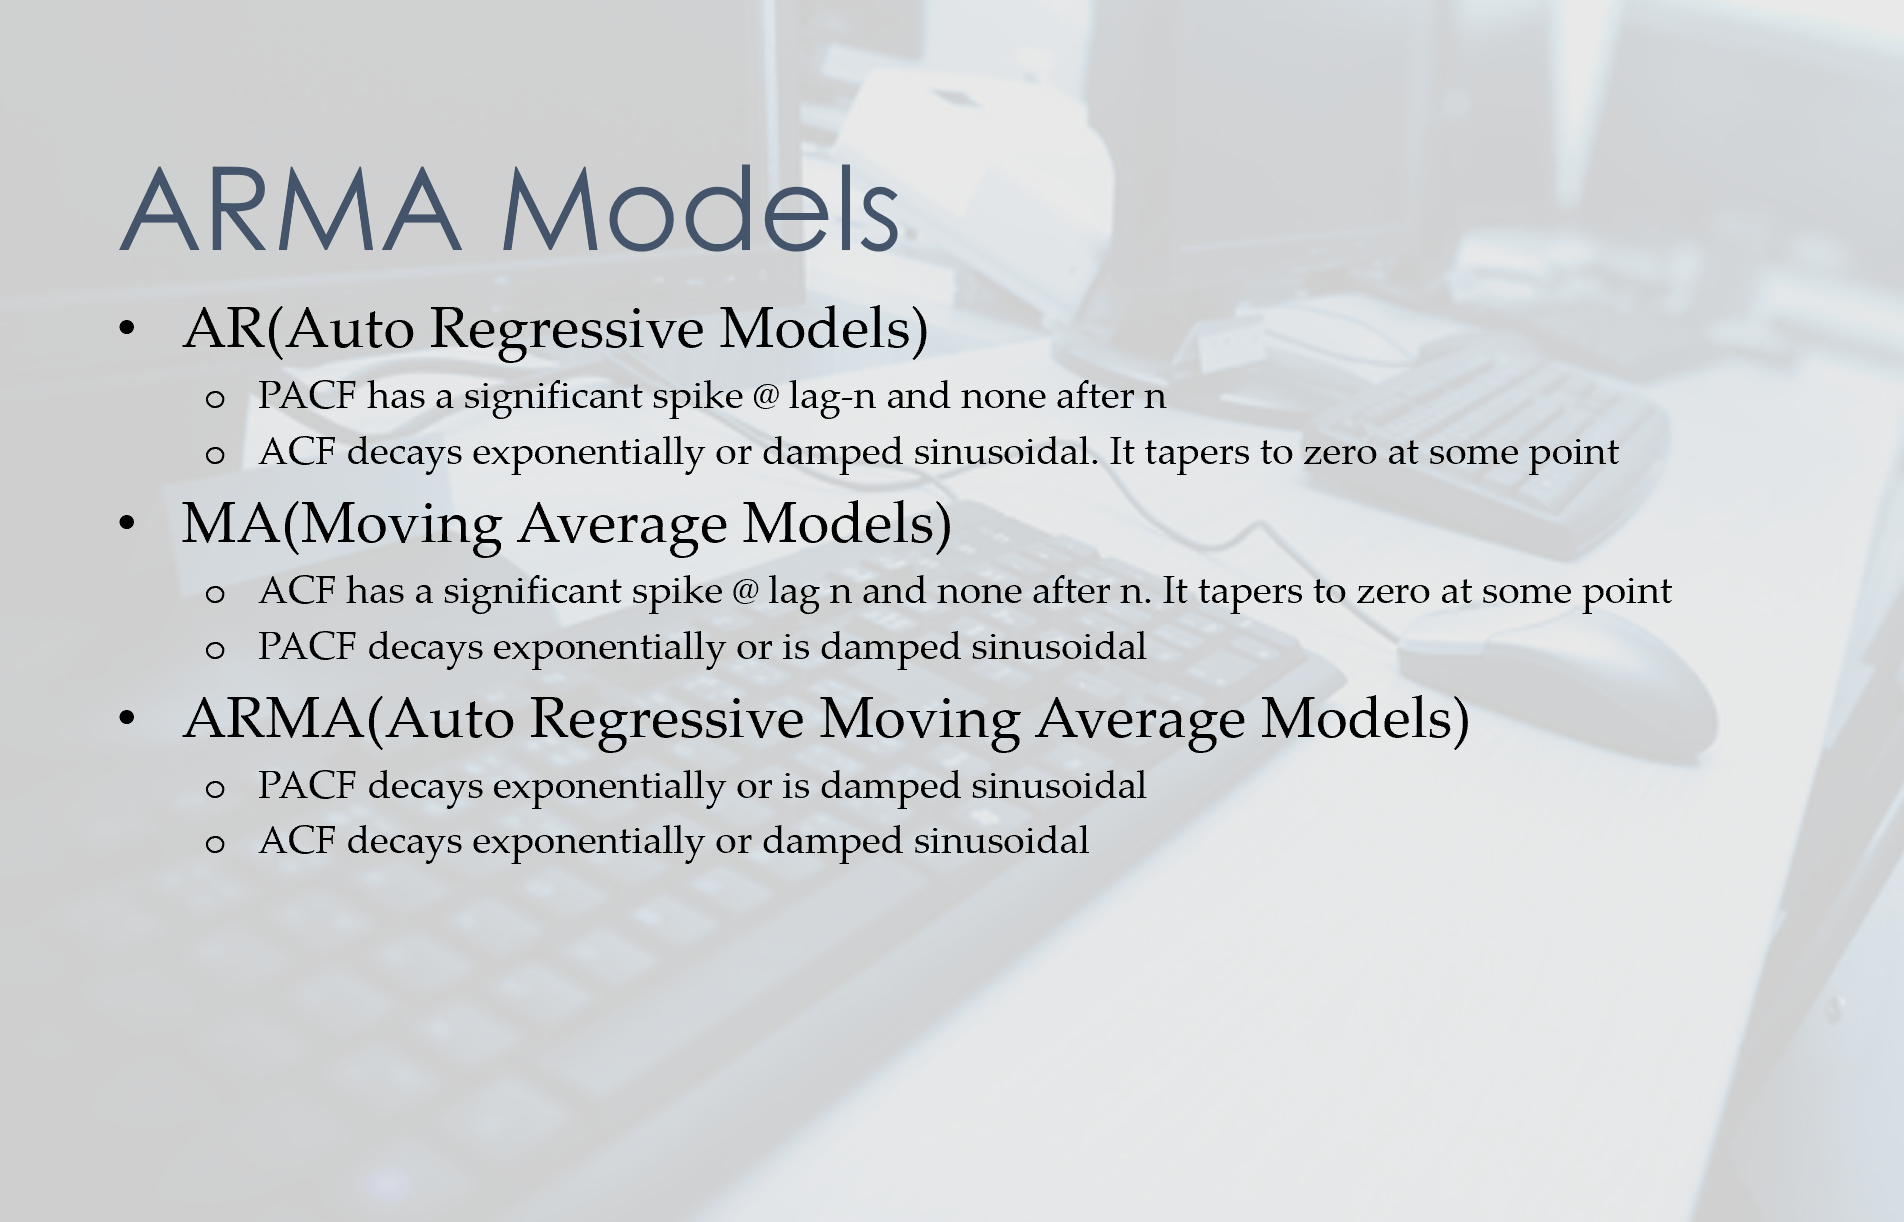

In [14]:
# Fit a Seasonal ARIMA Model
model=SARIMAX(ts,order=(0,1,1),seasonal_order=(0,1,1,4))
# Extract fitted model
model_fit=model.fit(disp=False)
# Calculate residuals on original series
prediction=pd.Series(model_fit.fittedvalues, copy=True)
print(prediction.head(10))

c:\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1Q-OCT will be used.
  warnings.warn('No frequency information was'
c:\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
c:\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1Q-OCT will be used.
  warnings.warn('No frequency information was'
c:\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


Date
2017-10-31         0.000000
2017-07-31    118674.504450
2017-04-30    123167.514663
2017-01-31    117896.204546
2016-10-31    240103.671322
2016-07-31    123306.335960
2016-04-30    115301.179893
2016-01-31    128913.782842
2015-10-31    120088.346953
2015-07-31    120130.260688
dtype: float64


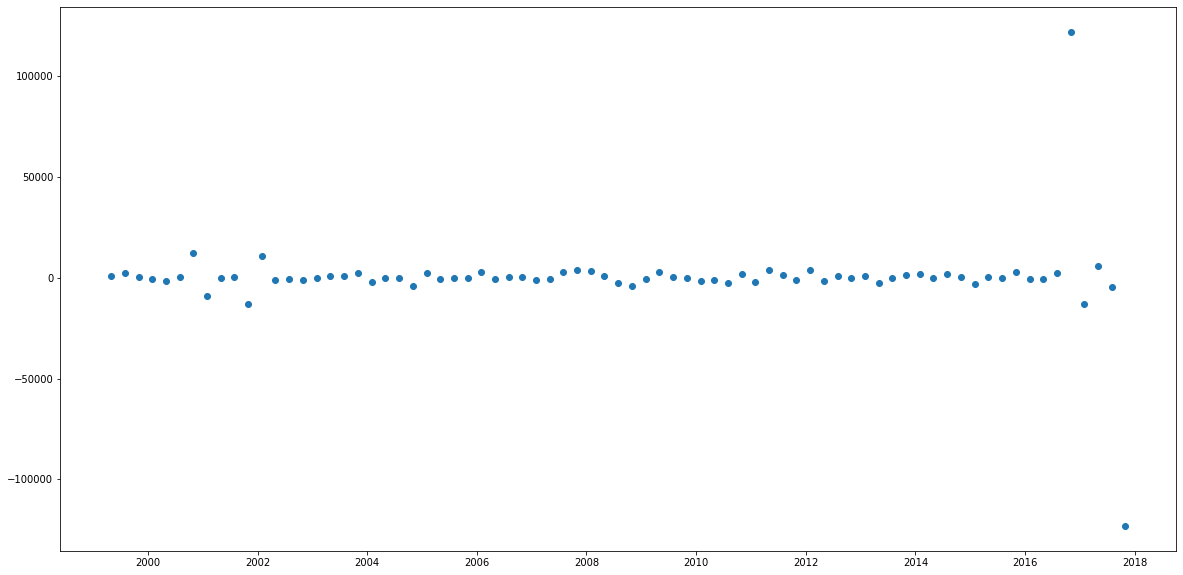

In [15]:
# Compute Residuals and check residual plot
residual=prediction-ts
plt.figure(figsize=(20,10))
plt.plot(residual, 'o')



In [16]:
model_fit


In [17]:
#from pyramid.arima import auto_arima
from pmdarima import auto_arima

stepwise_model = auto_arima(ts,start_p=1, start_q=1,
                           max_p=3, max_q=3, m=4,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(stepwise_model.aic())
stepwise_model.fit(ts)   # Train the model by calling .fit on the training data
    # Predicit on test data
future_forecast = stepwise_model.predict(n_periods=10)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[4]             : AIC=1339.056, Time=0.17 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=1336.159, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=1337.369, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=1337.124, Time=0.09 sec
 ARIMA(0,1,0)(1,1,0)[4]             : AIC=1337.872, Time=0.03 sec
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=1337.288, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[4]             : AIC=inf, Time=0.24 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=1336.460, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=1336.225, Time=0.03 sec
 ARIMA(1,1,1)(0,1,0)[4]             : AIC=1338.095, Time=0.13 sec
 ARIMA(0,1,0)(0,1,0)[4] intercept   : AIC=1338.144, Time=0.26 sec

Best model:  ARIMA(0,1,0)(0,1,0)[4]          
Total fit time: 1.110 seconds
1336.1592276992553


In [18]:
print(future_forecast)

[43550. 32580. 30595. 26811. 35232. 24262. 22277. 18493. 26914. 15944.]
